# Scenario C - Peak Number Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [2]:
# load results from disk
df = pd.read_csv('./output_adapt_diag/scenario_peaks.csv')
df.index += 1
#df.sort_values(by=['waic'], ascending=False)
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,model,peaks
1,1.000000,0.000000,5071.285714,1.090198,0.999629,-4219.027740,0.059135,0.05,2,2
2,1.000000,0.000000,3031.857143,1.110878,0.998638,-1573.498398,0.141730,0.05,2,2
3,1.000000,0.000000,4864.142857,1.057377,0.999766,-4084.045340,0.061871,0.05,2,2
4,1.000000,0.000000,4240.142857,1.066171,0.999877,-4724.473255,0.049980,0.05,2,2
5,1.000000,0.000286,5036.285714,1.120153,0.978553,1282.587347,0.367608,0.05,2,3
6,1.000000,0.001000,4582.857143,1.121779,0.865258,4262.295757,0.996014,0.05,2,3
7,1.000000,0.000857,4351.857143,1.035329,0.940199,4673.679506,1.134533,0.05,2,3
8,1.000000,0.001429,5014.714286,1.062113,0.759498,5164.150029,1.349402,0.05,2,3
9,1.000000,0.000286,5129.142857,1.096689,0.996319,716.965528,0.304074,0.05,2,4
10,1.000000,0.002714,4312.714286,1.049535,0.733657,7299.673734,2.747274,0.05,2,4


In [3]:
peak_numbers = [2, 3, 4]
waic_mat = np.full((3,3),0.0)
rhat_mat = np.full((3,3),0.0)
r2_mat = np.full((3,3),0.0)
bfmi_mat = np.full((3,3),0.0)
mcse_mat = np.full((3,3),0.0)
noise_mat = np.full((3,3),0.0)
ess_mat = np.full((3,3),0.0)

ldata = []

for i, val in enumerate(peak_numbers):
    ret1 = df.loc[(df['model'] == val)]
    for j, val in enumerate(peak_numbers):
        ret2 = ret1.loc[(ret1['peaks'] == val)]
        waic_mat[i][j] = ret2['waic'].mean()
        rhat_mat[i][j] = ret2['r_hat'].mean()
        r2_mat[i][j] = ret2['r2'].mean()
        bfmi_mat[i][j] = ret2['bfmi'].mean()
        mcse_mat[i][j] = ret2['mcse'].mean()
        noise_mat[i][j] = ret2['epsilon'].mean()
        ess_mat[i][j] = ret2['ess'].mean()
        #print(i, j, waic_mat[i][j], rhat_mat[i][j])
        
ldata += [waic_mat, rhat_mat, r2_mat, bfmi_mat, mcse_mat, noise_mat, ess_mat]

In [4]:
def heatmap(data, title, color, fsize, fname="./heatmap", precision=".3f"):
    
    sns.set(font_scale=1.3)

    yticks = ["m_2p", "m_3p", "m_4p"]
    xticks = ["d_2p", "d_3p", "d_4p"]

    plt.figure(figsize=fsize)
    plt.title(title)

    sns.heatmap(data, annot=True, fmt=precision, linewidths=1, square=True,
                    cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    plt.savefig(fname + '.png', dpi=150)

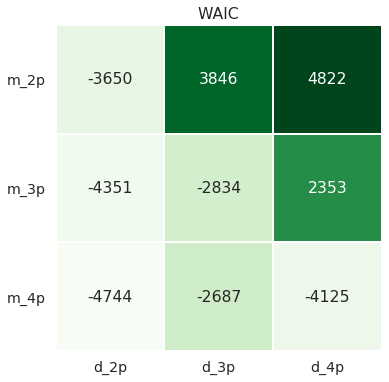

In [5]:
figs=(6,6)
col_r = "Greens_r"
col = "Greens"

heatmap(waic_mat, "WAIC", col, figs, "hmap_waic", ".0f")

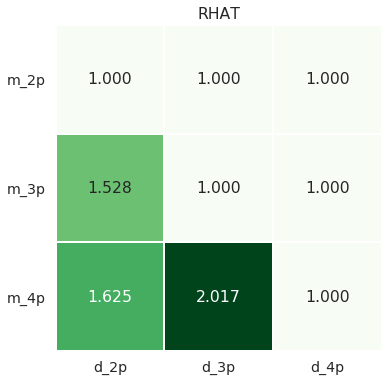

In [6]:
heatmap(rhat_mat, "RHAT", col, figs, "hmap_rhat")

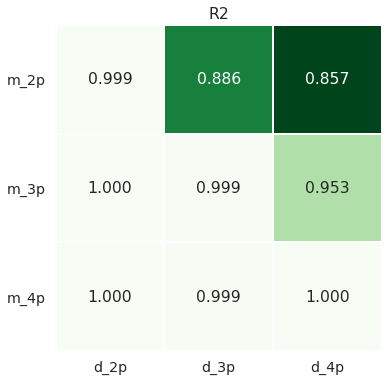

In [7]:
heatmap(r2_mat, "R2", col_r, figs, "hmap_r2")

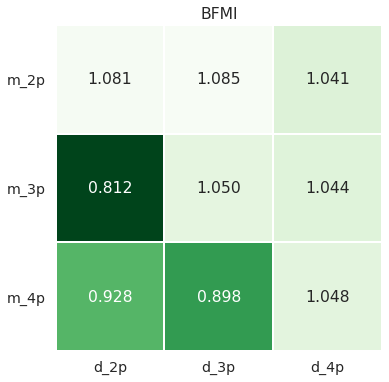

In [8]:
heatmap(bfmi_mat, "BFMI", col_r, figs, "hmap_bfmi")

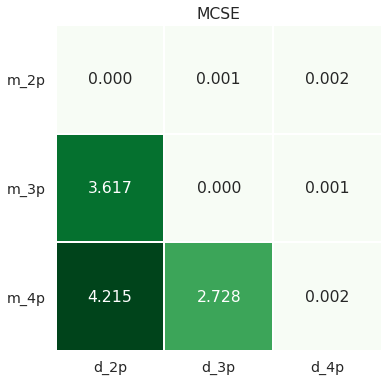

In [9]:
heatmap(mcse_mat, "MCSE", col, figs, "hmap_mcse")

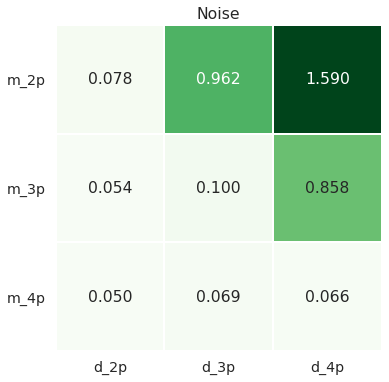

In [10]:
heatmap(noise_mat, "Noise", col, figs, "hmap_noise")

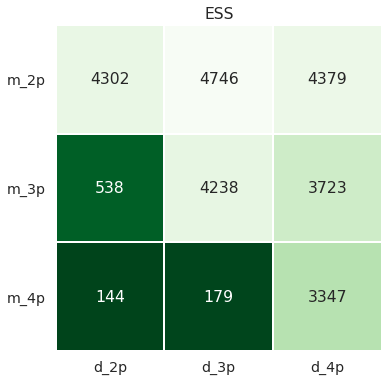

In [11]:
heatmap(ess_mat, "ESS", col_r, figs, "hmap_ess", ".0f")